In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression

In [2]:
df_day1_aspirin = pd.read_csv("raw_day1\day1_DILL-Aspirin_raw.csv")
df_day1_ch2cl2 = pd.read_csv("raw_day1\day1_DILL-CH2Cl2_raw.csv")
df_day1_etac = pd.read_csv("raw_day1\day1_DILL-ETAC_raw.csv")
df_day1_etoh = pd.read_csv("raw_day1\day1_DILL-EtOH_raw.csv")
day1_list = [df_day1_aspirin, df_day1_ch2cl2, df_day1_etac, df_day1_etoh]

df_day2_aspirin = pd.read_csv("raw_day2\day2_DILL-Aspirin_raw.csv")
df_day2_ch2cl2 = pd.read_csv("raw_day2\day2_DILL-CH2Cl2_raw.csv")
df_day2_etac = pd.read_csv("raw_day2\day2_DILL-ETAC_raw.csv")
df_day2_etoh = pd.read_csv("raw_day2\day2_DILL-EtOH_raw.csv")
day2_list = [df_day2_aspirin, df_day2_ch2cl2, df_day2_etac, df_day2_etoh]

In [3]:
df_day2_aspirin

,con,N1,N2,N3,Average,N1_calc,N2_calc,N3_calc,MeanN,SDN
0,0.0,0.780,0.761,0.689,0.743333,186.751796,182.202713,164.964086,177.972865,9.384199
1,0.3,0.569,0.588,0.632,0.596333,136.233041,140.782123,151.316840,142.777334,6.317484
2,1.0,0.566,0.546,0.634,0.582000,135.514765,130.726257,151.795690,139.345571,9.018003
3,3.0,0.352,0.378,0.365,0.365000,84.277733,90.502793,87.390263,87.390263,2.541370
4,10.0,0.014,0.014,0.013,0.013667,3.351955,3.351955,3.112530,3.272147,0.112866


## viability,SD,bar graph, ic50

In [4]:
day1_list

[    con     N1     N2     N3   Average     N1_calc    N2_calc     N3_calc  \
 0   0.0  0.438  0.398  0.417  0.417667  104.868316  95.291301   99.840383   
 1   0.3  0.396  0.417  0.424  0.412333   94.812450  99.840383  101.516361   
 2   1.0  0.389  0.368  0.407  0.388000   93.136472  88.108540   97.446129   
 3   3.0  0.289  0.285  0.300  0.291333   69.193935  68.236233   71.827614   
 4  10.0  0.001  0.001  0.012  0.004667    0.239425   0.239425    2.873105   
 
         MeanN       SDN  
 0  100.000000  3.911429  
 1   98.723065  2.848614  
 2   92.897047  3.815813  
 3   69.752594  1.518460  
 4    1.117318  1.241528  ,
     con     N1     N2     N3   Average     N1_calc    N2_calc    N3_calc  \
 0   0.0  0.438  0.398  0.417  0.417667  104.868316  95.291301  99.840383   
 1   0.3  0.326  0.323  0.340  0.329667   78.052674  77.334397  81.404629   
 2   1.0  0.344  0.319  0.330  0.331000   82.362330  76.376696  79.010375   
 3   3.0  0.112  0.113  0.118  0.114333   26.815642  27.055

In [5]:
for df in day1_list:
    df.clip(lower=0, inplace=True)
    df["day"] = 1

In [6]:
for df in day2_list:
    df.clip(lower=0, inplace=True)
    df["day"] = 2

In [7]:
df_day1_ch2cl2

,con,N1,N2,N3,Average,N1_calc,N2_calc,N3_calc,MeanN,SDN,day
0,0.0,0.438,0.398,0.417,0.417667,104.868316,95.291301,99.840383,100.000000,3.911429,1
1,0.3,0.326,0.323,0.340,0.329667,78.052674,77.334397,81.404629,78.930567,1.773832,1
2,1.0,0.344,0.319,0.330,0.331000,82.362330,76.376696,79.010375,79.249800,2.449483,1
3,3.0,0.112,0.113,0.118,0.114333,26.815642,27.055068,28.252195,27.374302,0.628412,1
4,10.0,0.225,0.229,0.261,0.238333,53.870710,54.828412,62.490024,57.063049,3.857317,1


In [8]:
df_d1d2_aspirin = pd.concat([df_day1_aspirin, df_day2_aspirin], ignore_index=True)
df_d1d2_aspirin
df_d1d2_aspirin = df_d1d2_aspirin.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_aspirin.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_aspirin["substance"] = "aspirin"
df_d1d2_aspirin = df_d1d2_aspirin.reset_index()

df_d1d2_ch2cl2 = pd.concat([df_day1_ch2cl2, df_day2_ch2cl2], ignore_index=True)
df_d1d2_ch2cl2
df_d1d2_ch2cl2 = df_d1d2_ch2cl2.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_ch2cl2.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_ch2cl2["substance"] = "ch2cl2"
df_d1d2_ch2cl2 = df_d1d2_ch2cl2.reset_index()

df_d1d2_etac = pd.concat([df_day1_etac, df_day2_etac], ignore_index=True)
df_d1d2_etac
df_d1d2_etac = df_d1d2_etac.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_etac.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_etac["substance"] = "etac"
df_d1d2_etac = df_d1d2_etac.reset_index()

df_d1d2_etoh = pd.concat([df_day1_etoh, df_day2_etoh], ignore_index=True)
df_d1d2_etoh
df_d1d2_etoh = df_d1d2_etoh.pivot(index="con", columns="day", values=["MeanN", "SDN"])
df_d1d2_etoh.columns = ["Day1", "Day2", "SD1", "SD2"]
df_d1d2_etoh["substance"] = "etoh"
df_d1d2_etoh = df_d1d2_etoh.reset_index()

viability_sd_list = [df_d1d2_aspirin, df_d1d2_ch2cl2, df_d1d2_etac, df_d1d2_etoh]

In [9]:
viability_sd_list

[    con        Day1        Day2       SD1       SD2 substance
 0   0.0  100.000000  177.972865  3.911429  9.384199   aspirin
 1   0.3   98.723065  142.777334  2.848614  6.317484   aspirin
 2   1.0   92.897047  139.345571  3.815813  9.018003   aspirin
 3   3.0   69.752594   87.390263  1.518460  2.541370   aspirin
 4  10.0    1.117318    3.272147  1.241528  0.112866   aspirin,
     con        Day1        Day2       SD1       SD2 substance
 0   0.0  100.000000  177.972865  3.911429  9.384199    ch2cl2
 1   0.3   78.930567  118.595371  1.773832  6.499369    ch2cl2
 2   1.0   79.249800  102.713488  2.449483  5.964848    ch2cl2
 3   3.0   27.374302    6.065443  0.628412  0.813890    ch2cl2
 4  10.0   57.063049   11.013567  3.857317  1.368430    ch2cl2,
     con        Day1        Day2       SD1       SD2 substance
 0   0.0  100.000000  177.972865  3.911429  9.384199      etac
 1   0.3   82.202713  121.149242  2.960453  0.704849      etac
 2   1.0   85.315243  114.046289  4.631642  6.868166 

In [10]:
# Extract Day1 and SD1 data for each substance
day1_dfs = []
for df in viability_sd_list:
    substance_col = df.columns[-1]  # Last column is the substance identifier
    substance_name = df[substance_col].iloc[0]
    df_day1 = df[['con', 'Day1', 'SD1']].copy()
    df_day1.rename(columns={'Day1': f'{substance_name}_Day1', 'SD1': f'{substance_name}_SD1'}, inplace=True)
    day1_dfs.append(df_day1)

# Merge all Day1 data on 'con'
merged_day1 = day1_dfs[0]
for df in day1_dfs[1:]:
    merged_day1 = pd.merge(merged_day1, df, on='con')

merged_day1


,con,aspirin_Day1,aspirin_SD1,ch2cl2_Day1,ch2cl2_SD1,etac_Day1,etac_SD1,etoh_Day1,etoh_SD1
0,0.0,100.000000,3.911429,100.000000,3.911429,100.000000,3.911429,100.000000,3.911429
1,0.3,98.723065,2.848614,78.930567,1.773832,82.202713,2.960453,74.780527,2.257324
2,1.0,92.897047,3.815813,79.249800,2.449483,85.315243,4.631642,76.376696,15.780294
3,3.0,69.752594,1.518460,27.374302,0.628412,44.293695,6.996795,42.298484,6.636111
4,10.0,1.117318,1.241528,57.063049,3.857317,98.723065,2.668516,65.043895,2.697006


# line graph concentration&viability each substance

In [11]:
df_d1d2_aspirin_forline = df_d1d2_aspirin.drop(columns=["substance"])
df_d1d2_aspirin_forline

,con,Day1,Day2,SD1,SD2
0,0.0,100.000000,177.972865,3.911429,9.384199
1,0.3,98.723065,142.777334,2.848614,6.317484
2,1.0,92.897047,139.345571,3.815813,9.018003
3,3.0,69.752594,87.390263,1.518460,2.541370
4,10.0,1.117318,3.272147,1.241528,0.112866


### line graph concentration&viability all

In [12]:
df = pd.concat(viability_sd_list, ignore_index=True)
df


,con,Day1,Day2,SD1,SD2,substance
0,0.0,100.000000,177.972865,3.911429,9.384199,aspirin
1,0.3,98.723065,142.777334,2.848614,6.317484,aspirin
2,1.0,92.897047,139.345571,3.815813,9.018003,aspirin
3,3.0,69.752594,87.390263,1.518460,2.541370,aspirin
4,10.0,1.117318,3.272147,1.241528,0.112866,aspirin
5,0.0,100.000000,177.972865,3.911429,9.384199,ch2cl2
6,0.3,78.930567,118.595371,1.773832,6.499369,ch2cl2
7,1.0,79.249800,102.713488,2.449483,5.964848,ch2cl2
8,3.0,27.374302,6.065443,0.628412,0.813890,ch2cl2
9,10.0,57.063049,11.013567,3.857317,1.368430,ch2cl2


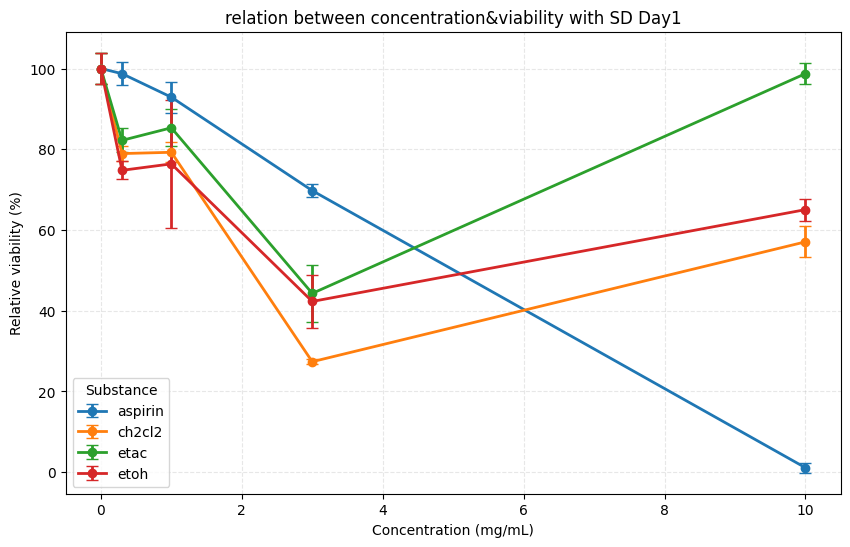

In [24]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day1"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("relation between concentration&viability with SD Day1")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()

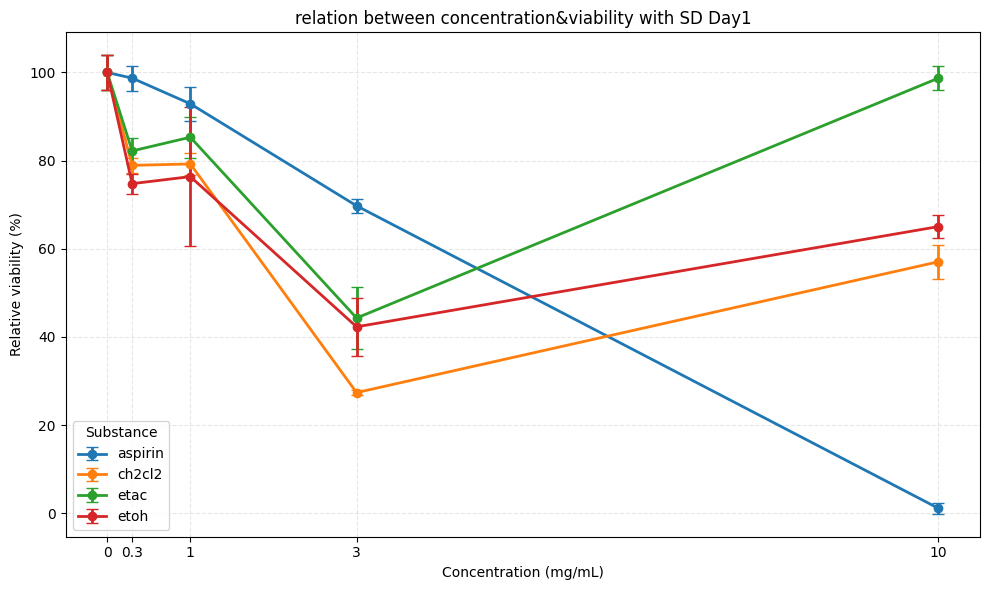

In [23]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day1"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("relation between concentration&viability with SD Day1")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

# Set x-axis ticks to show all concentration values as integers
x_values = sorted(df["con"].unique())
plt.xticks(x_values, [int(x) if x == int(x) else x for x in x_values])

plt.tight_layout()
plt.show()

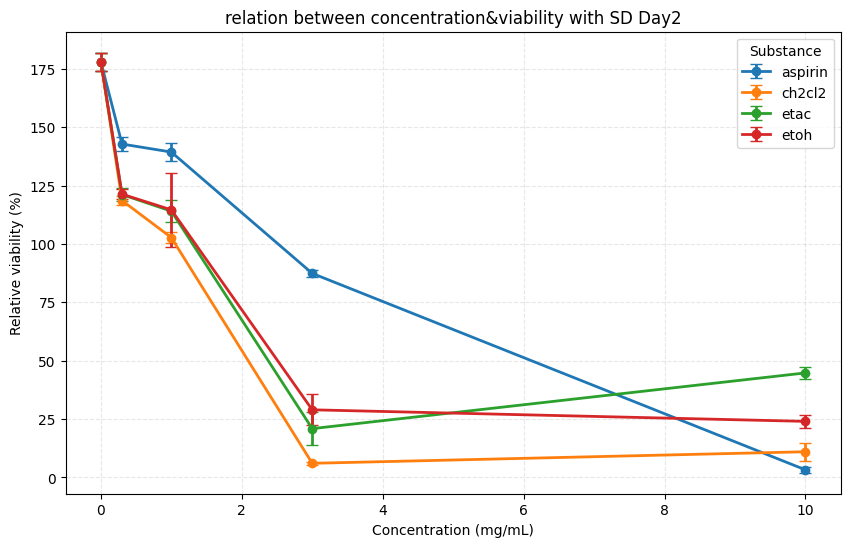

In [22]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day2"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("relation between concentration&viability with SD Day2")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()

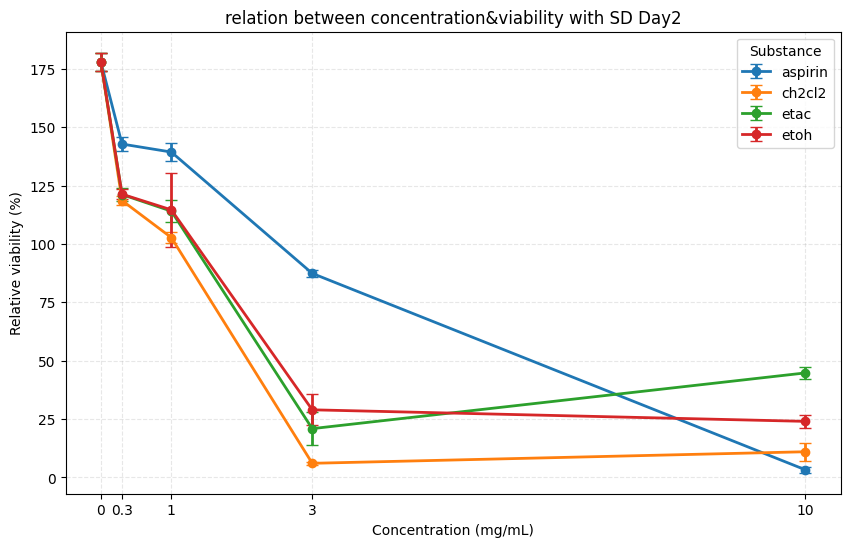

In [21]:
df = pd.concat(viability_sd_list, ignore_index=True)

# ----------------------
# 2) Plot line + SD
# ----------------------
plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):
    plt.errorbar(
        subdf["con"],
        subdf["Day2"],
        yerr=subdf["SD1"],
        marker="o",
        capsize=4,
        linewidth=2,
        label=substance
    )

plt.xlabel("Concentration (mg/mL)")
plt.ylabel("Relative viability (%)")
plt.title("relation between concentration&viability with SD Day2")
plt.legend(title="Substance")
plt.grid(True, linestyle="--", alpha=0.3)

x_values = sorted(df["con"].unique())
plt.xticks(x_values, [int(x) if x == int(x) else x for x in x_values])

plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_31820\3301227134.py:7: RuntimeWarning: invalid value encountered in power
  return bottom + (top - bottom) / (1 + (x / ic50)**hill)


⚠️ aspirin: sigmoid fit failed, plot only raw data.
⚠️ ch2cl2: sigmoid fit failed, plot only raw data.
⚠️ etac: sigmoid fit failed, plot only raw data.
⚠️ etoh: sigmoid fit failed, plot only raw data.


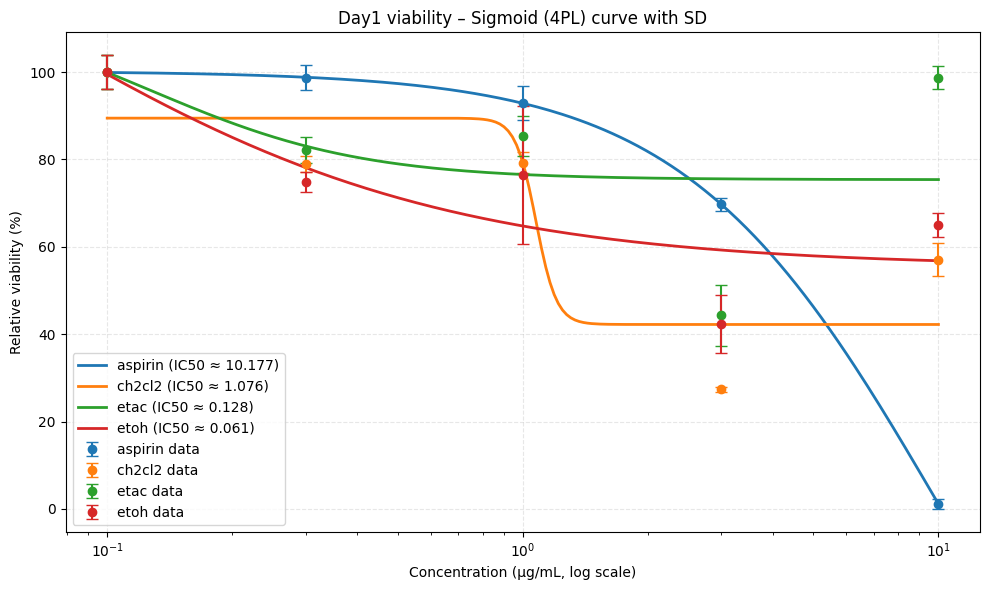

In [17]:
from scipy.optimize import curve_fit

# ------------------
# 4-parameter logistic function (4PL)
# ------------------
def sigmoid_4pl(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

# ------------------
# เตรียม df
# ------------------
df = pd.concat(viability_sd_list, ignore_index=True)
equations = {}   # เก็บสมการ

# ป้องกัน log(0)
df["con"] = df["con"].replace(0, 0.1)

plt.figure(figsize=(10,6))

colors = {
    "aspirin": "tab:blue",
    "ch2cl2": "tab:orange",
    "etac": "tab:green",
    "etoh": "tab:red"
}

for substance, subdf in df.groupby("substance"):

    # sort X ก่อนฟิต
    subdf = subdf.sort_values("con")
    x = subdf["con"].values
    y = subdf["Day1"].values
    yerr = subdf["SD1"].values

    # initial guess
    p0 = [min(y), max(y), np.median(x), -1]

    # ฟิต sigmoid
    try:
        popt, pcov = curve_fit(
            sigmoid_4pl,
            x, y, p0=p0,
            maxfev=10000
        )
        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 200)
        y_fit = sigmoid_4pl(x_fit, *popt)
        label_curve = f"{substance} (IC50 ≈ {popt[2]:.3f})"

        # plot curve
        plt.plot(x_fit, y_fit, color=colors[substance], linewidth=2, label=label_curve)



        # equation dictionary

        # ทำเป็นสมการ string แบบ paper
        eq = (
            f"{substance}:  y = {bottom:.3f} + "
            f"({top:.3f} - {bottom:.3f}) / [1 + (x/{ic50:.4f})^{hill:.3f}]"
        )
        equations[substance] = eq

    except:
        print(f"⚠️ {substance}: sigmoid fit failed, plot only raw data.")
        pass

    # plot points + SD
    plt.errorbar(
        x, y, yerr=yerr,
        fmt="o",
        color=colors[substance],
        capsize=4,
        markersize=6,
        label=substance + " data"
    )

# ------------------
# Final graph style
# ------------------
plt.xscale("log")
plt.xlabel("Concentration (µg/mL, log scale)")
plt.ylabel("Relative viability (%)")
plt.title("Day1 viability – Sigmoid (4PL) curve with SD")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# แสดงผลสมการทั้งหมด
for key, val in equations.items():
    print(val)

In [18]:
df = pd.concat(viability_sd_list, ignore_index=True)
df["con"] = df["con"].replace(0, 0.1)
df

,con,Day1,Day2,SD1,SD2,substance
0,0.1,100.000000,177.972865,3.911429,9.384199,aspirin
1,0.3,98.723065,142.777334,2.848614,6.317484,aspirin
2,1.0,92.897047,139.345571,3.815813,9.018003,aspirin
3,3.0,69.752594,87.390263,1.518460,2.541370,aspirin
4,10.0,1.117318,3.272147,1.241528,0.112866,aspirin
5,0.1,100.000000,177.972865,3.911429,9.384199,ch2cl2
6,0.3,78.930567,118.595371,1.773832,6.499369,ch2cl2
7,1.0,79.249800,102.713488,2.449483,5.964848,ch2cl2
8,3.0,27.374302,6.065443,0.628412,0.813890,ch2cl2
9,10.0,57.063049,11.013567,3.857317,1.368430,ch2cl2


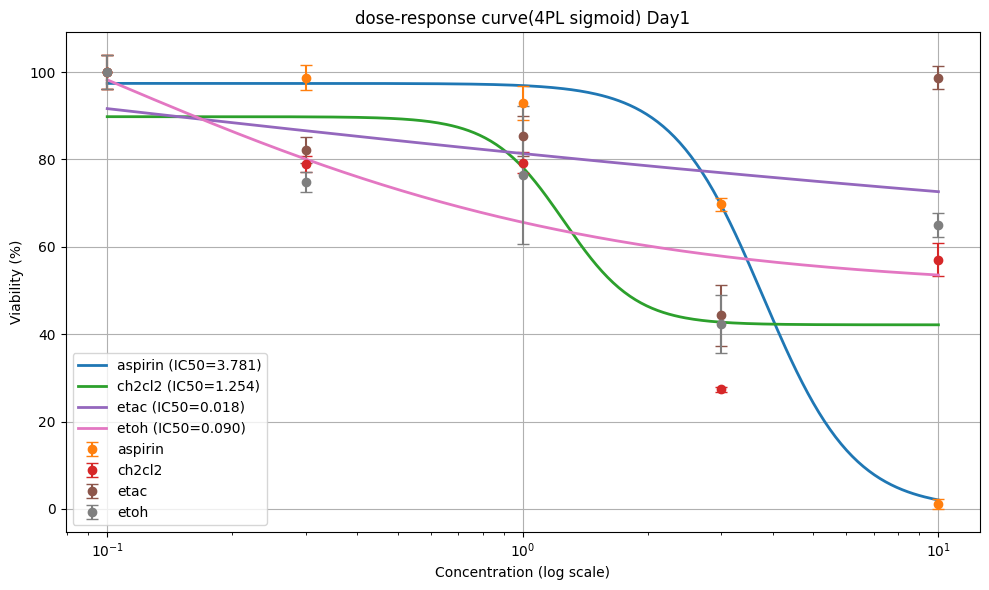

aspirin: y = 0.000 + (97.422-0.000)/[1+(x/3.7806)^3.956]
ch2cl2: y = 42.142 + (89.800-42.142)/[1+(x/1.2538)^5.000]
etac: y = 50.000 + (150.000-50.000)/[1+(x/0.0175)^0.194]
etoh: y = 50.000 + (150.000-50.000)/[1+(x/0.0905)^0.702]


In [19]:
from scipy.optimize import curve_fit

def sigmoid_4pl(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

df = pd.concat(viability_sd_list, ignore_index=True)
df["con"] = df["con"].replace(0, 0.1)

equations = {}

plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):

    subdf = subdf.sort_values("con")
    x = subdf["con"].values
    y = subdf["Day1"].values
    yerr = subdf["SD1"].values

    # initial guess (ดีขึ้น)
    p0 = [10, 100, np.median(x), 1]

    # bounds ป้องกัน IC50 เพี้ยน
    bounds = (
        [0,   50,   min(x)/10, 0.01],      # bottom, top, IC50 low bound, Hill
        [50, 150,   max(x)*10, 5]          # bottom, top, IC50 high bound, Hill
    )

    try:
        popt, pcov = curve_fit(
            sigmoid_4pl,
            x, y,
            p0=p0,
            bounds=bounds,
            maxfev=20000
        )

        bottom, top, ic50, hill = popt

        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 300)
        y_fit = sigmoid_4pl(x_fit, *popt)

        plt.plot(x_fit, y_fit, linewidth=2, label=f"{substance} (IC50={ic50:.3f})")

        eq = (
            f"{substance}: y = {bottom:.3f} + ({top:.3f}-{bottom:.3f})"
            f"/[1+(x/{ic50:.4f})^{hill:.3f}]"
        )
        equations[substance] = eq

    except Exception as e:
        print(f"{substance}: Fit failed → {e}")

    plt.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markersize=6, label=substance)

plt.xscale("log")
plt.xlabel("Concentration (log scale)")
plt.ylabel("Viability (%)")
plt.title("dose-response curve(4PL sigmoid) Day1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print all equations
for key, val in equations.items():
    print(val)


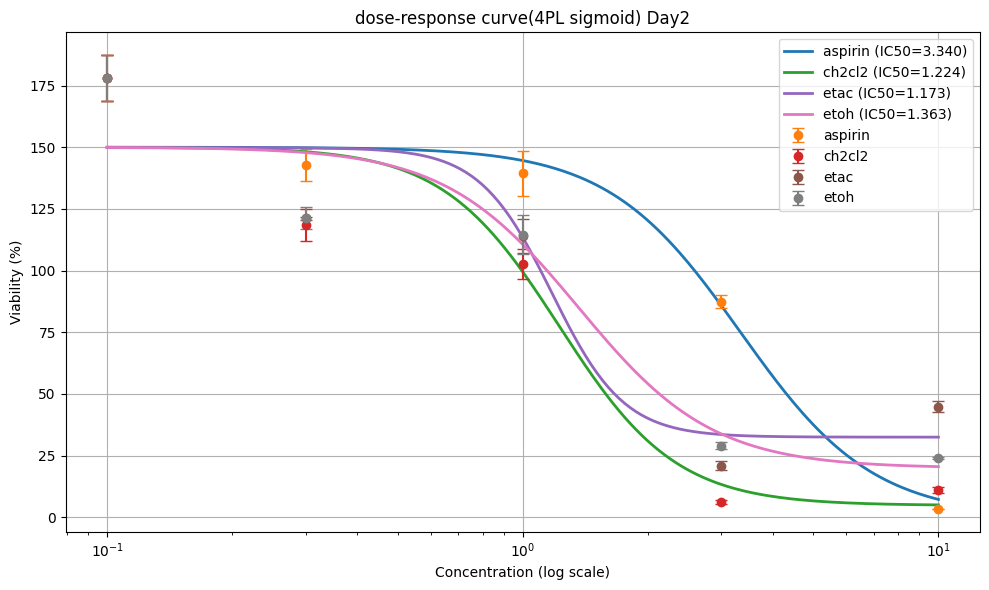

aspirin: y = 0.000 + (150.000-0.000)/[1+(x/3.3397)^2.724]
ch2cl2: y = 4.763 + (150.000-4.763)/[1+(x/1.2244)^3.095]
etac: y = 32.454 + (149.816-32.454)/[1+(x/1.1730)^5.000]
etoh: y = 19.890 + (150.000-19.890)/[1+(x/1.3626)^2.689]


In [20]:
from scipy.optimize import curve_fit

def sigmoid_4pl(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

df = pd.concat(viability_sd_list, ignore_index=True)
df["con"] = df["con"].replace(0, 0.1)

equations = {}

plt.figure(figsize=(10,6))

for substance, subdf in df.groupby("substance"):

    subdf = subdf.sort_values("con")
    x = subdf["con"].values
    y = subdf["Day2"].values
    yerr = subdf["SD2"].values

    # initial guess (ดีขึ้น)
    p0 = [10, 100, np.median(x), 1]

    # bounds ป้องกัน IC50 เพี้ยน
    bounds = (
        [0,   50,   min(x)/10, 0.01],      # bottom, top, IC50 low bound, Hill
        [50, 150,   max(x)*10, 5]          # bottom, top, IC50 high bound, Hill
    )

    try:
        popt, pcov = curve_fit(
            sigmoid_4pl,
            x, y,
            p0=p0,
            bounds=bounds,
            maxfev=20000
        )

        bottom, top, ic50, hill = popt

        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 300)
        y_fit = sigmoid_4pl(x_fit, *popt)

        plt.plot(x_fit, y_fit, linewidth=2, label=f"{substance} (IC50={ic50:.3f})")

        eq = (
            f"{substance}: y = {bottom:.3f} + ({top:.3f}-{bottom:.3f})"
            f"/[1+(x/{ic50:.4f})^{hill:.3f}]"
        )
        equations[substance] = eq

    except Exception as e:
        print(f"{substance}: Fit failed → {e}")

    plt.errorbar(x, y, yerr=yerr, fmt="o", capsize=4, markersize=6, label=substance)

plt.xscale("log")
plt.xlabel("Concentration (log scale)")
plt.ylabel("Viability (%)")
plt.title("dose-response curve(4PL sigmoid) Day2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print all equations
for key, val in equations.items():
    print(val)